# Historic Real Estate Calculator
This calculator compares median home prices from 2000-present for any city in the USA.  

The next implementations will be the ability to compare neighborhoods, zip codes, and counties.   

Initial output will be mostly graphs, similar to comparing stocks.  

Additionally, I would like to add in more metrics like exact percent change,  
and the ability to set time windows (although this data only has 20 years,  
so shorter timescales may be a little futile).  

Would like data going back further in time, with the at least the same frequency of monthly reporting.  

The current dataset is about 130MB.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def select_state(df, StateName, RegionName=None):
    # Use this function to choose your state / filter the dataframe

    is_state = df['StateName'] == StateName
    state_df = df[is_state]

    # Transpose only occurs if RegionName is provided 
    if RegionName:
        region = state_df['RegionName'] == RegionName
        filtered = state_df[region].T
        filtered.columns = [f'{RegionName}']
        return filtered

    return state_df

# pay attention to .T method, transposing 
# dataframes in the correct order matters here

def get_city(df, RegionName):
    '''Un-needed for now, could be adjusted to select 
    all cities in the US with a given name'''
    
    new_df = df.loc[df['RegionName'] == RegionName].T
    new_df.columns = [f'{RegionName}']
    
    return new_df[8:]

In [3]:
# Loading in local data
# TODO - test via url

path = 'raw-data/City_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv'
df = pd.read_csv(path)

In [4]:
# Useful for filtering out unwanted columns, such as all non-numeric

needed_cols = df.columns[8:]
needed_cols = needed_cols.insert(0, ['RegionName', 'State'])
needed_cols = list(needed_cols)
df[needed_cols].head(3)

,RegionName,State,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30
0,New York,NY,254669.0,256495.0,258193.0,261235.0,264004.0,266859.0,269901.0,272608.0,...,709415.0,713067.0,718363.0,724143.0,728605.0,732052.0,736370.0,741438.0,747886.0,753611.0
1,Los Angeles,CA,248825.0,249070.0,250224.0,252383.0,255015.0,257436.0,259950.0,262783.0,...,960435.0,976171.0,987732.0,991712.0,996940.0,1003480.0,1009311.0,1019514.0,1037513.0,1059119.0
2,Houston,TX,111361.0,111358.0,111146.0,111159.0,111120.0,111366.0,111563.0,111906.0,...,232615.0,238156.0,242399.0,246061.0,248572.0,251457.0,254482.0,257949.0,262436.0,267255.0


In [5]:
# Would really like to include population and other data here. 
# Could be incredible to make decisions about school, 
# demographics, median income, etc.

sf = select_state(df, 'CA', 'San Francisco')
sj = select_state(df, 'CA', 'San Jose')
ok = select_state(df, 'CA', 'Oakland')
berk = select_state(df, 'CA', 'Berkeley')
vallejo = select_state(df, 'CA', 'Vallejo')

In [6]:
merge_1 = pd.merge(sf, sj, left_index=True, right_index=True)

merge_2 = pd.merge(merge_1, ok, left_index=True, right_index=True)

merge_3 = pd.merge(merge_2, berk, left_index=True, right_index=True)

final_merge = pd.merge(merge_3, vallejo, left_index=True, right_index=True)

In [7]:
final_merge

,San Francisco,San Jose,Oakland,Berkeley,Vallejo
RegionID,20330,33839,13072,16992,34520
SizeRank,14,11,45,304,295
RegionName,San Francisco,San Jose,Oakland,Berkeley,Vallejo
RegionType,City,City,City,City,City
StateName,CA,CA,CA,CA,CA
...,...,...,...,...,...
2021-12-31,1676525.0,1461476.0,1056806.0,1696171.0,577005.0
2022-01-31,1684650.0,1489816.0,1069971.0,1721524.0,585901.0
2022-02-28,1708739.0,1528456.0,1086069.0,1748429.0,593825.0
2022-03-31,1736702.0,1567577.0,1105155.0,1777891.0,600759.0


<AxesSubplot:>

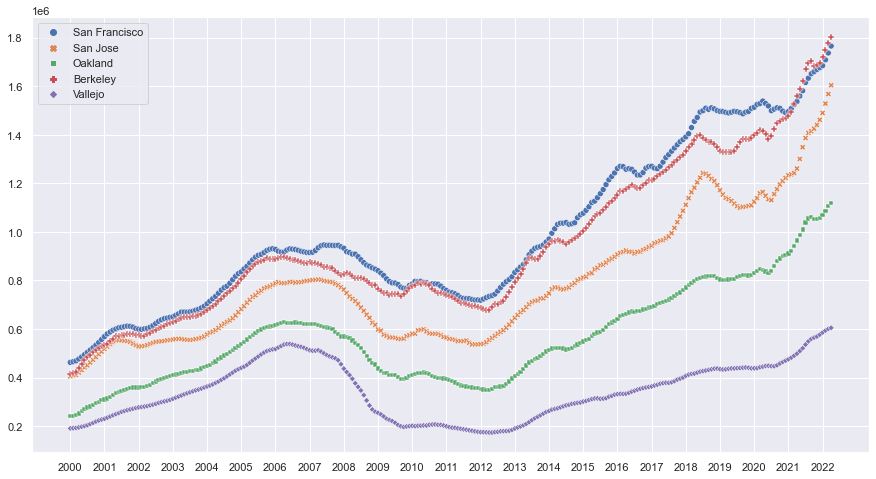

In [8]:
plt.figure(figsize=(15,8));
sns.set_theme()
# sns.set_style('whitegrid')
# output = sns.scatterplot(x=ca.index, y = ca.T.loc["Newport Beach"]);
plt.xticks(range(0, 267, (267//21)), range(2000, 2023, 1));
sns.scatterplot(data=final_merge[8:], style=None)


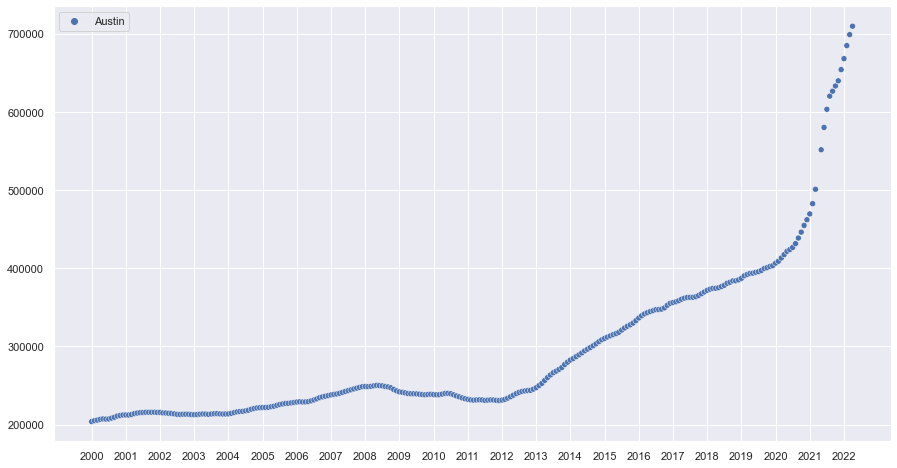

In [9]:
# formatting
plt.figure(figsize=(15,8));
sns.set_theme()
plt.xticks(range(0, 267, (267//21)), range(2000, 2023, 1))

# plot
sns.scatterplot(data=select_state(df, 'TX', 'Austin')[8:]);

In [10]:
jerseyCity = select_state(df, 'NJ', 'Jersey City')
newark = select_state(df, 'NJ', 'Newark')
trenton = select_state(df, 'NJ', 'Trenton')
unionCity = select_state(df, 'NJ', 'Union City')

In [11]:
one = pd.merge(jerseyCity, newark, left_index=True, right_index=True)
two = pd.merge(one, trenton, left_index=True, right_index=True)
three = pd.merge(two, unionCity, left_index=True, right_index=True)

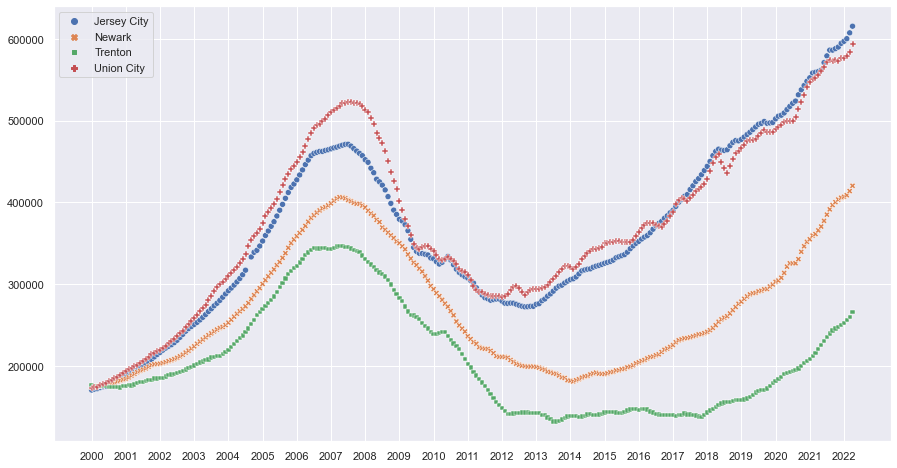

In [12]:
# formatting
plt.figure(figsize=(15,8));
sns.set_theme()
plt.xticks(range(0, 267, (267//21)), range(2000, 2023, 1))

# plot
sns.scatterplot(data=three[8:]);

In [13]:
df.tail()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30
22395,213097,29449,McAlisterville,City,PA,PA,NaN,Juniata County,NaN,NaN,...,183061.0,183964.0,184928.0,185475.0,186081.0,188933.0,192310.0,195154.0,196032.0,196553.0
22396,5617,29449,Letts,City,IA,IA,NaN,Louisa County,NaN,NaN,...,98542.0,98703.0,99093.0,99275.0,100189.0,101569.0,103132.0,104460.0,104906.0,104882.0
22397,5873,29449,McGuffey,City,OH,OH,NaN,Hardin County,NaN,NaN,...,57766.0,58415.0,58587.0,59053.0,59073.0,58833.0,58336.0,58099.0,58314.0,58732.0
22398,4128,29449,Cleveland,City,VA,VA,NaN,Russell County,NaN,NaN,...,38419.0,38829.0,38858.0,38628.0,38622.0,38893.0,39518.0,39990.0,40357.0,40301.0
22399,48272,29449,Villard,City,MN,MN,NaN,Pope County,NaN,NaN,...,114623.0,116404.0,117969.0,119597.0,120801.0,122609.0,124021.0,124835.0,124878.0,124728.0
